# Project Title

## Overview

Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem.

Most naturally, your audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?

## Business Understanding

Objective: 
Predict customer churn for SyriaTel and reduce the loss of revenue from customers leaving. We aim to create a model for churn prediction that helps the telecom company design targeted retention strategies.

Key Questions:
* What are the main factors driving churn?
* Can we identify churn-prone customers in advance?

Success Metric: 
1. Primary Metric: Recall - to identify potential churners and use strategies to prevent them from churning
2. Secondary Metric: Precision - to avoid overspending on non-churners

To evaluate and compare overall performance of our models, we will use AUC-ROC in addition to recall and precision.

## Data Understanding

In [1]:
# Imports here
import pandas as pd

df=pd.read_csv('Data\syriatel_customer_info.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [3]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [4]:
df.churn=df.churn.astype(int)

In [5]:
y=df['churn']
X=df.drop('churn',axis=1)

### Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=10)

## Data Preparation

### Dealing with Missing Data

In [7]:
X_train.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

We see here that there are no null values.

### Dealing with Categorical Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

There are a number of categorical variables here: state, phone number, international plan and voice mail plan. Area code is also categorical even though it is an integer here. We can drop this too.

In [9]:
#drop phone number, state, and area code
X_train = X_train.drop(columns=['phone number','state','area code'])
X_test = X_test.drop(columns=['phone number','state','area code'])

In [10]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['international plan', 'voice mail plan']
label_encoder = LabelEncoder()
for col in binary_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.fit_transform(X_test[col])

In [11]:
X_train_categorical=X_train[['international plan','voice mail plan']]
X_test_categorical=X_test[['international plan','voice mail plan']]

### Normalization

In [12]:
#Create dataframe with only numeric features
X_train_numeric=X_train.drop(['international plan','voice mail plan'],axis=1)
X_test_numeric=X_test.drop(['international plan','voice mail plan'],axis=1)

In [13]:
#Scale using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)

X_train_scaled

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
2937,0.392562,0.80,0.313149,0.545455,0.313094,0.526917,0.910256,0.526893,0.287427,0.639098,0.287307,0.708995,0.210526,0.709804,0.000000
248,0.384298,0.00,0.524221,0.515152,0.524254,0.514887,0.551282,0.514862,0.620853,0.481203,0.621053,0.486772,0.105263,0.486275,0.444444
592,0.376033,0.00,0.508362,0.515152,0.508311,0.187068,0.724359,0.187190,0.512963,0.556391,0.512693,0.507937,0.052632,0.507843,0.222222
1756,0.483471,0.78,0.443483,0.642424,0.443521,0.276992,0.634615,0.277070,0.263730,0.526316,0.263777,0.486772,0.315789,0.486275,0.111111
1685,0.280992,0.00,0.414072,0.533333,0.414009,0.332632,0.474359,0.332626,0.476164,0.375940,0.476161,0.571429,0.263158,0.572549,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0.314050,0.58,0.608708,0.539394,0.608718,0.578346,0.544872,0.578556,0.349038,0.548872,0.349226,0.513228,0.473684,0.513725,0.222222
1344,0.454545,0.00,0.820069,0.539394,0.820047,0.378346,0.647436,0.378627,0.612211,0.436090,0.612384,0.444444,0.421053,0.445098,0.000000
527,0.388430,0.44,0.117935,0.763636,0.117877,0.307368,0.500000,0.307502,0.671871,0.436090,0.671827,0.629630,0.368421,0.629412,0.000000
3197,0.119835,0.00,0.713379,0.648485,0.713365,0.435188,0.410256,0.435244,0.736549,0.428571,0.736223,0.597884,0.105263,0.598039,0.000000


In [14]:
scaler.fit(X_test_numeric)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)

X_test_scaled

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1570,0.495536,0.000000,0.465889,0.546875,0.465786,0.439420,0.529412,0.439277,0.675429,0.488722,0.675349,0.865,0.15,0.864815,0.285714
290,0.883929,0.666667,0.649563,0.710938,0.649460,0.624005,0.582353,0.623954,0.726571,0.390977,0.726811,0.400,0.10,0.400000,0.000000
1768,0.508929,0.000000,0.332945,0.625000,0.332876,0.626280,0.588235,0.626296,0.384857,0.616541,0.385006,0.540,0.10,0.540741,0.285714
101,0.477679,0.000000,0.497085,0.835938,0.496999,0.537543,0.447059,0.537638,0.240286,0.451128,0.240152,0.730,0.25,0.729630,0.000000
705,0.437500,0.000000,0.160641,0.398438,0.160521,0.656997,0.376471,0.657076,0.354000,0.593985,0.353875,0.425,0.25,0.425926,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,0.183036,0.000000,0.504082,0.757812,0.504030,0.496587,0.552941,0.496487,0.343714,0.541353,0.343710,0.600,0.30,0.600000,0.285714
3210,0.410714,0.000000,0.468222,0.656250,0.468187,0.784983,0.747059,0.784878,0.432000,0.045113,0.432020,0.570,0.15,0.570370,0.142857
182,0.294643,0.705882,0.314286,0.632812,0.314183,0.676052,0.552941,0.675811,0.356857,0.458647,0.357052,0.495,0.60,0.494444,0.285714
2523,0.388393,0.000000,0.397959,0.671875,0.397873,0.444824,0.435294,0.444630,0.484857,0.360902,0.484752,0.390,0.50,0.390741,0.428571


In [15]:
X_train_full = pd.concat([X_train_scaled, X_train_categorical], axis=1)
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 2937 to 1289
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2499 non-null   float64
 1   number vmail messages   2499 non-null   float64
 2   total day minutes       2499 non-null   float64
 3   total day calls         2499 non-null   float64
 4   total day charge        2499 non-null   float64
 5   total eve minutes       2499 non-null   float64
 6   total eve calls         2499 non-null   float64
 7   total eve charge        2499 non-null   float64
 8   total night minutes     2499 non-null   float64
 9   total night calls       2499 non-null   float64
 10  total night charge      2499 non-null   float64
 11  total intl minutes      2499 non-null   float64
 12  total intl calls        2499 non-null   float64
 13  total intl charge       2499 non-null   float64
 14  customer service calls  2499 non-null   fl

In [16]:
X_test_full = pd.concat([X_test_scaled, X_test_categorical], axis=1)

### Address Class Imbalance
Let's see if there is class imbalance in the target feature (churn).

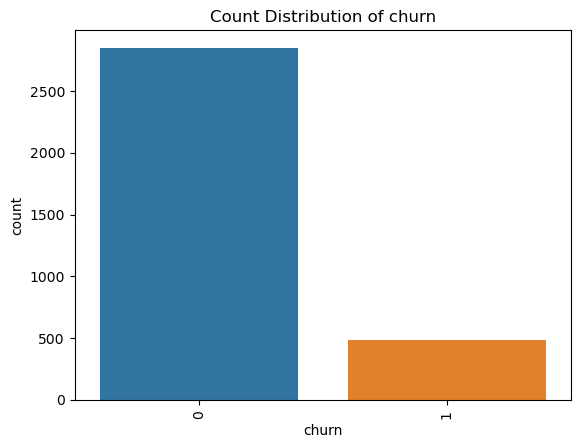

In [17]:
#Address class imbalance with SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()

ax = sns.countplot(data = df, x= 'churn')
ax.set_title(f'Count Distribution of churn')
plt.xticks(rotation= 90)

plt.show()

In [18]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 2937 to 1289
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2499 non-null   float64
 1   number vmail messages   2499 non-null   float64
 2   total day minutes       2499 non-null   float64
 3   total day calls         2499 non-null   float64
 4   total day charge        2499 non-null   float64
 5   total eve minutes       2499 non-null   float64
 6   total eve calls         2499 non-null   float64
 7   total eve charge        2499 non-null   float64
 8   total night minutes     2499 non-null   float64
 9   total night calls       2499 non-null   float64
 10  total night charge      2499 non-null   float64
 11  total intl minutes      2499 non-null   float64
 12  total intl calls        2499 non-null   float64
 13  total intl charge       2499 non-null   float64
 14  customer service calls  2499 non-null   fl

Since there is a class imbalance with fewer customers churning, we will use SMOTE to create synthetic data points for the churn class so that our model can train better.

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train) 

# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

-----------------------------------------
Synthetic sample class distribution: 

churn
0    2135
1    2135
Name: count, dtype: int64


C:\Users\hrcoh\anaconda3.0\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\hrcoh\anaconda3.0\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


## Analysis and Results

In [20]:
#Fit Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_resampled, y_train_resampled)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [21]:
#Performance on Training Data
import numpy as np
y_hat_train = logreg.predict(X_train_resampled)

train_residuals = np.abs(y_train_resampled - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    3219
1    1051
Name: count, dtype: int64

Residuals (proportions)
0    0.753864
1    0.246136
Name: proportion, dtype: float64


This shows that this classifier is about 91% correct on the training data.

In [22]:
#Performance on Test Data
y_hat_test = logreg.predict(X_test_full)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    522
1    312
Name: count, dtype: int64

Residuals (proportions)
0    0.625899
1    0.374101
Name: proportion, dtype: float64


The classifier is also about 62% accurate on the test data.

In [23]:
#Calculate precision, recall, accuracy, and f1
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def evaluation_metrics(y_train, y_hat_train, y_test, y_hat_test):
    # Calculate metrics for training and testing sets
    metrics = {
        "Metric": ["Precision", "Recall", "Accuracy", "F1-Score"],
        "Training": [
            precision_score(y_train, y_hat_train),
            recall_score(y_train, y_hat_train),
            accuracy_score(y_train, y_hat_train),
            f1_score(y_train, y_hat_train),
        ],
        "Testing": [
            precision_score(y_test, y_hat_test),
            recall_score(y_test, y_hat_test),
            accuracy_score(y_test, y_hat_test),
            f1_score(y_test, y_hat_test),
        ],
    }
    
    # Convert to DataFrame
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

# Call the function and store the DataFrame
logreg_evaluation = evaluation_metrics(y_train_resampled, y_hat_train, y_test, y_hat_test)

# Display the DataFrame
print(logreg_evaluation)

      Metric  Training   Testing
0  Precision  0.747037  0.245383
1     Recall  0.767681  0.781513
2   Accuracy  0.753864  0.625899
3   F1-Score  0.757219  0.373494


In [24]:
#ROC and AUC
from sklearn.metrics import roc_curve, auc

# First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test_full)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [25]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7538814127049422


AUC: 0.7538814127049422


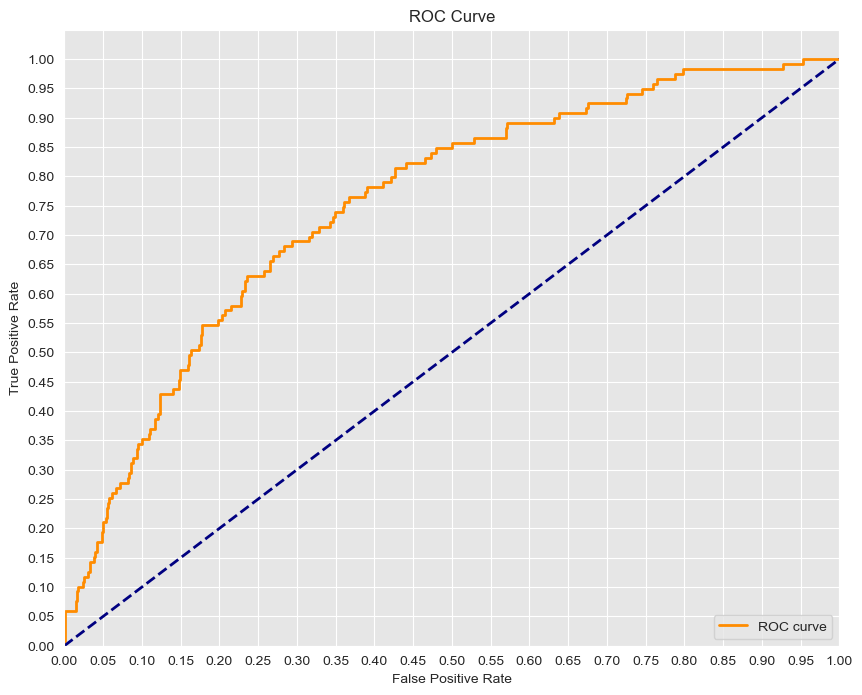

In [26]:
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest Classifier Model

In [27]:
#Fit the Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=10)
model_forest=forest.fit(X_train_resampled, y_train_resampled)

In [28]:
#Performance on Test Data
y_hat_test = forest.predict(X_test_full)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    734
1    100
Name: count, dtype: int64

Residuals (proportions)
0    0.880096
1    0.119904
Name: proportion, dtype: float64


In [29]:
#Evaluate
random_forest_evaluation=evaluation_metrics(y_train_resampled, y_hat_train, y_test,y_hat_test)

# Display the DataFrame
print(random_forest_evaluation)

      Metric  Training   Testing
0  Precision  0.747037  0.554286
1     Recall  0.767681  0.815126
2   Accuracy  0.753864  0.880096
3   F1-Score  0.757219  0.659864


### Decision Tree Model

In [30]:
#Fit the Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=10)
model_decision_tree=decision_tree.fit(X_train_resampled, y_train_resampled)

In [31]:
#Performance on Test Data
y_hat_test = decision_tree.predict(X_test_full)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    639
1    195
Name: count, dtype: int64

Residuals (proportions)
0    0.766187
1    0.233813
Name: proportion, dtype: float64


In [32]:
#Evaluate
decision_tree_evaluation = evaluation_metrics(y_train_resampled, y_hat_train, y_test,y_hat_test) 
print(decision_tree_evaluation)

      Metric  Training   Testing
0  Precision  0.747037  0.353846
1     Recall  0.767681  0.773109
2   Accuracy  0.753864  0.766187
3   F1-Score  0.757219  0.485488


### Comparing the Models

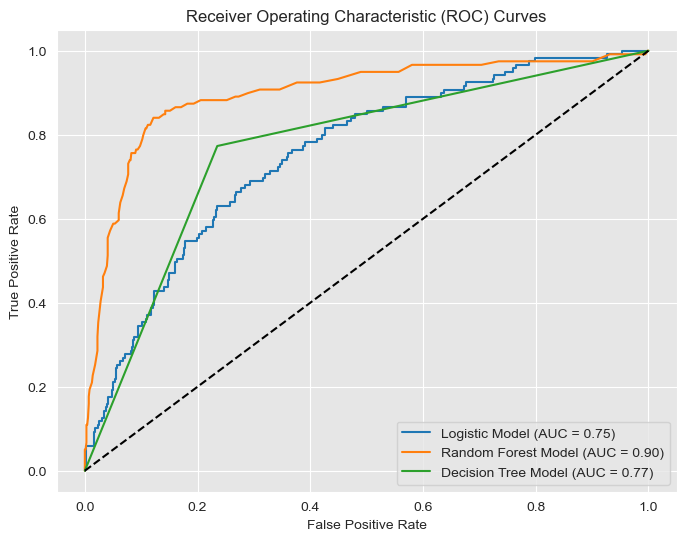

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

models = [ model_log,model_forest,model_decision_tree]
labels = ['Logistic Model', 'Random Forest Model','Decision Tree Model']

plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test_full)[:, 1]
    else:
        y_probs = model.predict(X_test_full)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

In [34]:
logreg_evaluation['Model'] = 'Logistic Regression'
random_forest_evaluation['Model'] = 'Random Forest'
decision_tree_evaluation['Model'] = 'Decision Tree'

# Concatenate them into one DataFrame
all_models_evaluation = pd.concat([logreg_evaluation, random_forest_evaluation, decision_tree_evaluation], ignore_index=True)

# Display the combined DataFrame
print(all_models_evaluation)

       Metric  Training   Testing                Model
0   Precision  0.747037  0.245383  Logistic Regression
1      Recall  0.767681  0.781513  Logistic Regression
2    Accuracy  0.753864  0.625899  Logistic Regression
3    F1-Score  0.757219  0.373494  Logistic Regression
4   Precision  0.747037  0.554286        Random Forest
5      Recall  0.767681  0.815126        Random Forest
6    Accuracy  0.753864  0.880096        Random Forest
7    F1-Score  0.757219  0.659864        Random Forest
8   Precision  0.747037  0.353846        Decision Tree
9      Recall  0.767681  0.773109        Decision Tree
10   Accuracy  0.753864  0.766187        Decision Tree
11   F1-Score  0.757219  0.485488        Decision Tree


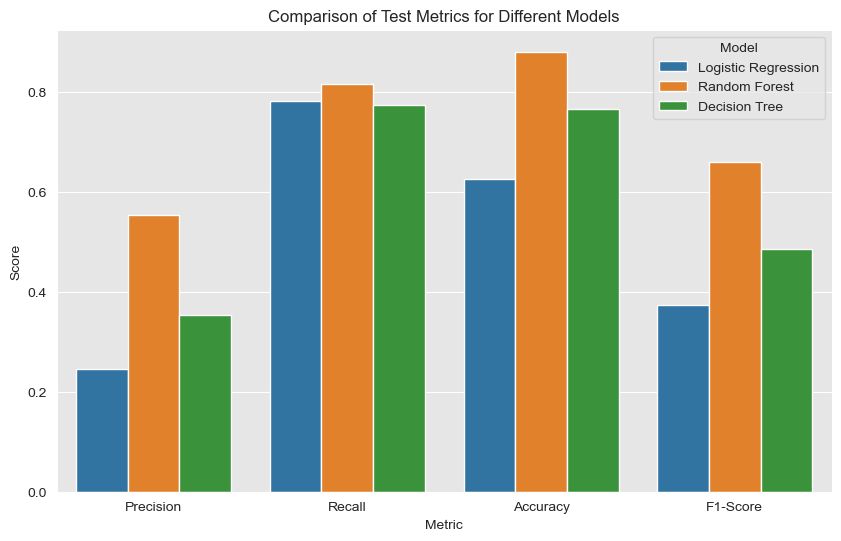

In [35]:
# Filter the DataFrame to keep only the rows corresponding to testing metrics
test_metrics_df = all_models_evaluation[["Metric", "Testing", "Model"]]

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Testing", hue="Model", data=test_metrics_df)

# Add labels and title
plt.title('Comparison of Test Metrics for Different Models')
plt.ylabel('Score')
plt.xlabel('Metric')

# Show the plot
plt.show()

### Feauture Importance

Text(0, 0.5, 'Features')

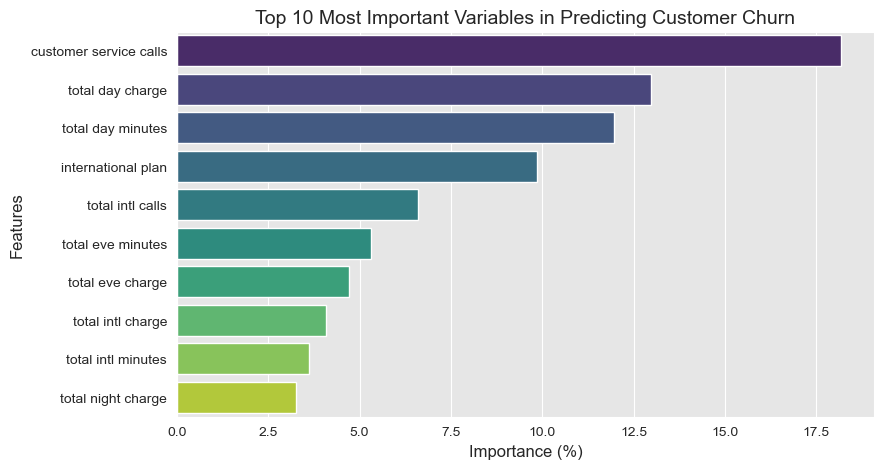

In [43]:
# Assuming 'model_forest' is your trained RandomForest model and 'X_train_resampled' is your feature set
Importance = pd.DataFrame({"Importance": model_forest.feature_importances_ * 100}, index=X_train_resampled.columns)

# Sort by importance and take the top 10(largest importance at top)
sorted_importance = Importance.sort_values(by="Importance", axis=0, ascending=False).head(10)

# Set the plot size and style
plt.figure(figsize=(9, 5))
sns.barplot(x=sorted_importance['Importance'], y=sorted_importance.index, palette="viridis")

# Add title and labels
plt.title("Top 10 Most Important Variables in Predicting Customer Churn", fontsize=14)
plt.xlabel('Importance (%)', fontsize=12)
plt.ylabel('Features', fontsize=12)

When the feature importance is expressed as a percentage, it represents the relative contribution of each feature to the total importance of all features. The sum of all feature importances in the model will be 100%.

### Business Recommendation 1

In [37]:
#customer service focus

### Business Recommendation 2

In [38]:
#incentive for international plans

### Business Recommendation 3

## Conclusion

### Next Steps

* Explore other models
* 